In [312]:
import wntr
import math
import matplotlib.pyplot as plt

In [124]:
def to_cbs(lbs):
    """ convert l/s in m³/s"""
    
    return lbs/1000.
    

# Einheiten

Demand = m3/s

# Beispiel 1

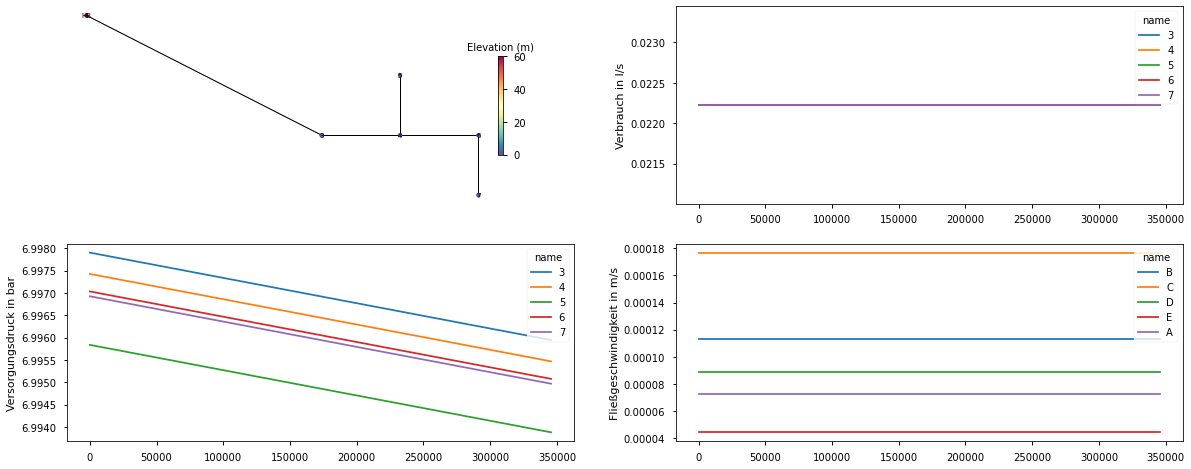

In [320]:
# neues Modell erstellen
wn = wntr.network.WaterNetworkModel()

tage = 4

wn.add_pattern('pat', [1])

Qdm = 80 #m³/d
Qsm = Qdm/3600.

# Knoten generieren
wn.add_junction('3', base_demand=to_cbs(Qsm), demand_pattern='pat', elevation=0, coordinates=(0,0))
wn.add_junction('4', base_demand=to_cbs(Qsm), demand_pattern='pat', elevation=0, coordinates=(1,0))
wn.add_junction('5', base_demand=to_cbs(Qsm), demand_pattern='pat', elevation=0, coordinates=(1,1))
wn.add_junction('6', base_demand=to_cbs(Qsm), demand_pattern='pat', elevation=0, coordinates=(2,0))
wn.add_junction('7', base_demand=to_cbs(Qsm), demand_pattern='pat', elevation=0, coordinates=(2,-1))

# Reservoir
wn.add_reservoir('res', base_head=20, head_pattern='pat', coordinates=(-4,2))

# Rohrnetzwerk
r = 0.1
wn.add_pipe('B', '3', '4', length=200, diameter=1.0, roughness=r, minor_loss=0.0, status='OPEN')
wn.add_pipe('C', '4', '5', length=100, diameter=0.4, roughness=r, minor_loss=0.0, status='OPEN')
wn.add_pipe('D', '4', '6', length=200, diameter=0.8, roughness=r, minor_loss=0.0, status='OPEN')
wn.add_pipe('E', '6', '7', length=200, diameter=.8, roughness=r, minor_loss=0.0, status='OPEN')


# Hochbehälter
wn.add_tank('HB', elevation=60.0, init_level=10, min_level=0.0, max_level=10, diameter=50, overflow=False, coordinates=(-3,2))
wn.add_pipe('A', 'HB', '3', length=3000, diameter=1.4, roughness=0.1, minor_loss=0.0, status='OPEN')

# Pumpe
#wn.add_curve('curve1', 'HEAD', [(400,300)])
#wn.add_pump('P', 'res', '8', pump_type='HEAD', pump_parameter='curve1', pattern=None)


# Simulate hydraulics
wn.options.time.duration = tage*24*3600
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

fig,axs = plt.subplots(2,2, figsize=(20,8))

# Netzplan
nodes, edges = wntr.graphics.plot_network(wn, node_attribute='elevation', node_colorbar_label='Elevation (m)', node_labels=True, ax=axs[0,0])
results.node['demand'].drop(columns=['res', 'HB']).mul(1000).plot(ax=axs[0,1])


p = results.node['pressure'].div(10)
p.drop(columns=['res', 'HB']).plot(ax=axs[1,0])

results.link['velocity'].plot(ax=axs[1,1])

axs[0,1].set_ylabel('Verbrauch in l/s')
axs[1,0].set_ylabel('Versorgungsdruck in bar')
axs[1,1].set_ylabel('Fließgeschwindigkeit in m/s')

plt.show()

2.2222222222222223e-05

# Beispiel 2

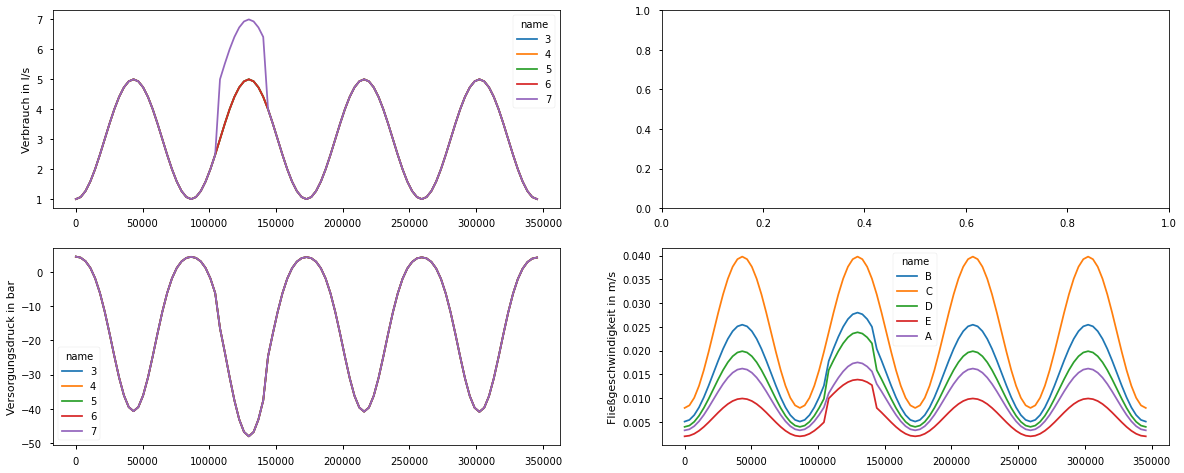

In [311]:
# neues Modell erstellen
wn = wntr.network.WaterNetworkModel()

tage = 4

x = list(range(0,tage*24*60*60, 3600))
v = 2
w = 3
y = [v*math.sin(2*math.pi/(24*3600)*(i-6*3600)) + w for i in x]

wn.add_pattern('pat2', y)
fire = y.copy()
for i in range(30,40):
    fire[i] += 2
wn.add_pattern('fire', fire)

# Knoten generieren
wn.add_junction('3', base_demand=to_cbs(1), demand_pattern='pat2', elevation=0, coordinates=(0,0))
wn.add_junction('4', base_demand=to_cbs(1), demand_pattern='pat2', elevation=0, coordinates=(1,0))
wn.add_junction('5', base_demand=to_cbs(1), demand_pattern='pat2', elevation=0, coordinates=(1,1))
wn.add_junction('6', base_demand=to_cbs(1), demand_pattern='pat2', elevation=0, coordinates=(2,0))
wn.add_junction('7', base_demand=to_cbs(1), demand_pattern='fire', elevation=0, coordinates=(2,-1))

#wn.add_junction('8', base_demand=0, elevation=50, coordinates=(-2,2))

# Reservoir
wn.add_reservoir('res', base_head=20, head_pattern='pat1', coordinates=(-4,2))

# Rohrnetzwerk
r = 100
wn.add_pipe('B', '3', '4', length=200, diameter=1.0, roughness=r, minor_loss=0.0, status='OPEN')
wn.add_pipe('C', '4', '5', length=100, diameter=0.4, roughness=r, minor_loss=0.0, status='OPEN')
wn.add_pipe('D', '4', '6', length=200, diameter=0.8, roughness=r, minor_loss=0.0, status='OPEN')
wn.add_pipe('E', '6', '7', length=200, diameter=.8, roughness=r, minor_loss=0.0, status='OPEN')


# Hochbehälter
wn.add_tank('HB', elevation=60.0, init_level=10, min_level=0.0, max_level=10, diameter=50, overflow=False, coordinates=(-3,2))
wn.add_pipe('A', 'HB', '3', length=3000, diameter=1.4, roughness=0.1, minor_loss=0.0, status='OPEN')

# Pumpe
#wn.add_curve('curve1', 'HEAD', [(400,300)])
#wn.add_pump('P', 'res', '8', pump_type='HEAD', pump_parameter='curve1', pattern=None)


# Simulate hydraulics
wn.options.time.duration = tage*24*3600
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

fig,axs = plt.subplots(2,2, figsize=(20,8))

results.node['demand'].drop(columns=['res', 'HB']).mul(1000).plot(ax=axs[0,0])


p = results.node['pressure'].div(10)
p.drop(columns=['res', 'HB']).plot(ax=axs[1,0])

results.link['velocity'].plot(ax=axs[1,1])

axs[0,0].set_ylabel('Verbrauch in l/s')
axs[1,0].set_ylabel('Versorgungsdruck in bar')
axs[1,1].set_ylabel('Fließgeschwindigkeit in m/s')

plt.show()

# Beispiel 3

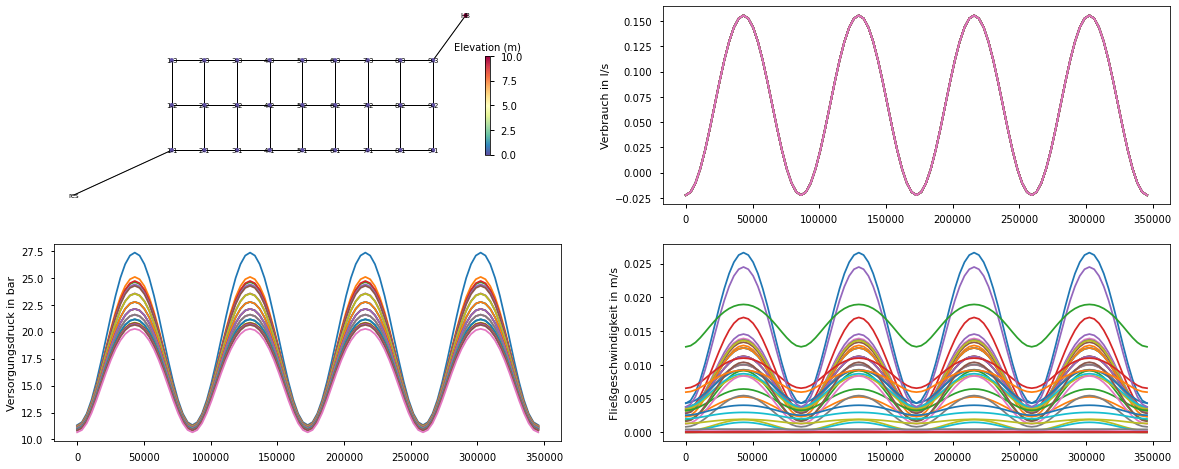

In [405]:
# neues Modell erstellen
wn = wntr.network.WaterNetworkModel()

tage = 4

x = list(range(0,tage*24*60*60, 3600))
v = 4
w = 3
y = [v*math.sin(2*math.pi/(24*3600)*(i-6*3600)) + w for i in x]

wn.add_pattern('pat', y)

Qdm = 80 #m³/d
Qsm = Qdm/3600.

# Knoten generieren
x=10
y=4
for i in range(1,x):
    for j in range(1,y):
        wn.add_junction('{}-{}'.format(i,j), base_demand=to_cbs(Qsm), demand_pattern='pat', elevation=0, coordinates=(float(i),float(j)))
#horizontal pipes
for i in range(1,x-1):
    for j in range(1,y):      
        wn.add_pipe('h-{}-{}'.format(i,j), '{}-{}'.format(i,j), '{}-{}'.format(i+1,j), length=200, diameter=0.4, roughness=0.4, minor_loss=0.0, status='OPEN')
#vertical pipes
for i in range(1,x):
    for j in range(1,y-1):      
        wn.add_pipe('v-{}-{}'.format(i,j), '{}-{}'.format(i,j), '{}-{}'.format(i,j+1), length=200, diameter=0.4, roughness=0.4, minor_loss=0.0, status='OPEN')

# Reservoir
wn.add_reservoir('res', base_head=20, head_pattern='pat', coordinates=(-2,0))

# Pumpe
wn.add_curve('curve1', 'HEAD', [(200,100)])
wn.add_pump('P', 'res', '1-1', pump_type='HEAD', pump_parameter='curve1', pattern=None)

# Hochbehälter
wn.add_tank('HB', elevation=10.0, init_level=10, min_level=0.0, max_level=10, diameter=10, overflow=True, coordinates=(x,y))
wn.add_pipe('pipe_HB', 'HB', '{}-{}'.format(x-1,y-1), length=200, diameter=0.4, roughness=0.1, minor_loss=0.0, status='OPEN')


# Simulate hydraulics
wn.options.time.duration = tage*24*3600
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()


fig,axs = plt.subplots(2,2, figsize=(20,8))

# Netzplan
nodes, edges = wntr.graphics.plot_network(wn, node_attribute='elevation', node_colorbar_label='Elevation (m)', node_labels=True, ax=axs[0,0])
results.node['demand'].drop(columns=['res', 'HB']).mul(1000).plot(ax=axs[0,1], legend=False)


p = results.node['pressure'].div(10)
p.drop(columns=['res', 'HB']).plot(ax=axs[1,0], legend=False)

results.link['velocity'].plot(ax=axs[1,1], legend=False)

axs[0,1].set_ylabel('Verbrauch in l/s')
axs[1,0].set_ylabel('Versorgungsdruck in bar')
axs[1,1].set_ylabel('Fließgeschwindigkeit in m/s')

plt.show()

<AxesSubplot:>

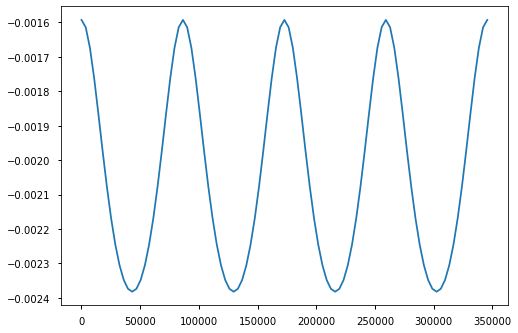

In [406]:
results.link['flowrate']['pipe_HB'].plot()

<AxesSubplot:>

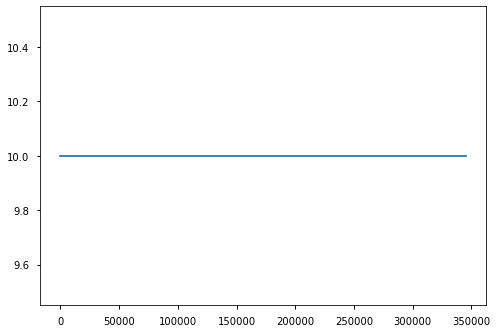

In [407]:
results.node['pressure']['HB'].plot()

flowrate


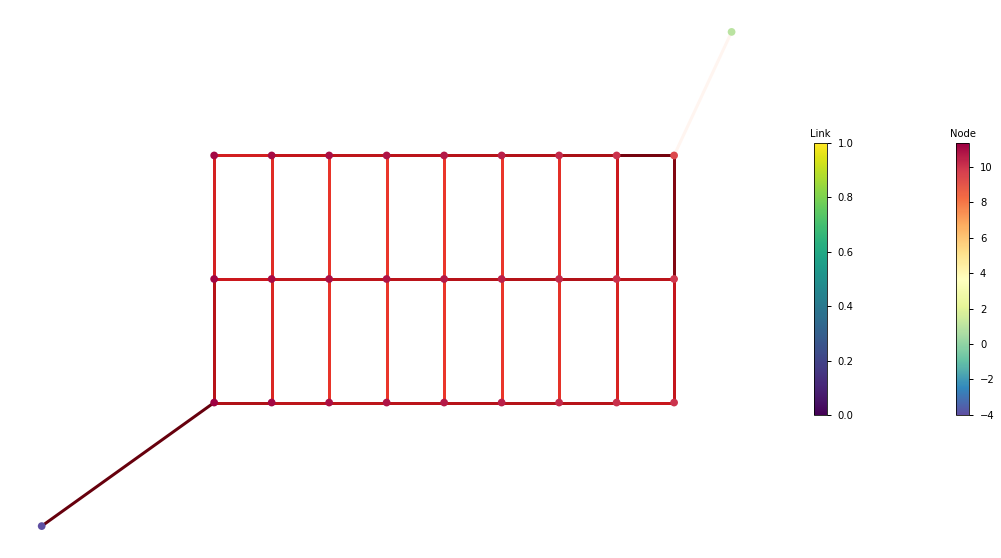

In [403]:
pressure = results.node['pressure'].div(10).iloc[0]

for par in ['flowrate', 'velocity']:
    print(par)
    p = results.link[par].iloc[0]
    
    fig,ax = plt.subplots(figsize=(20,10))
    wntr.graphics.plot_network(wn, link_attribute=p, node_attribute=pressure, link_width=3, node_size=60,link_labels=False,node_labels=False, ax=ax, 
                               link_cmap=plt.get_cmap('Reds'))#
    plt.show()
    
    break

# Plots

## Eingabewerte

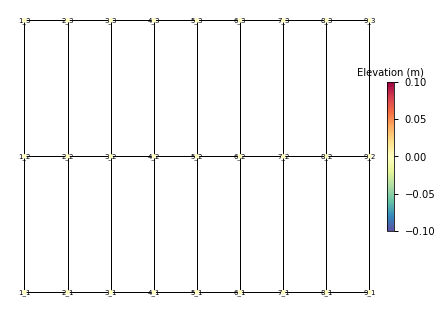

In [352]:
# Netzplan
nodes, edges = wntr.graphics.plot_network(wn, node_attribute='elevation', node_colorbar_label='Elevation (m)', node_labels=True)

<AxesSubplot:title={'center':'Pump curve'}, xlabel='Flow (m$^3$/s)', ylabel='Head (m)'>

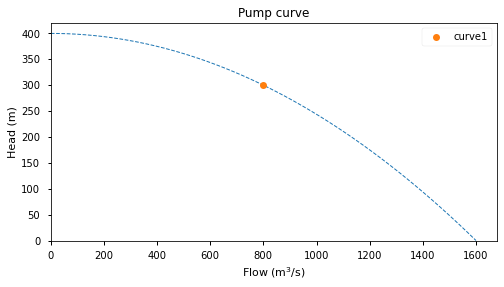

In [172]:
# Pumpenkennlinie
pump = wn.get_link('P')
wntr.graphics.plot_pump_curve(pump)

# Ergebnisse

<AxesSubplot:>

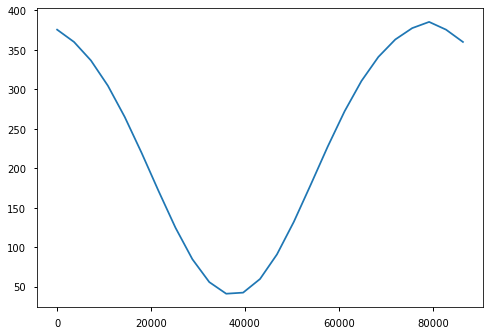

In [182]:
results.node['pressure']['7'].plot()

<AxesSubplot:>

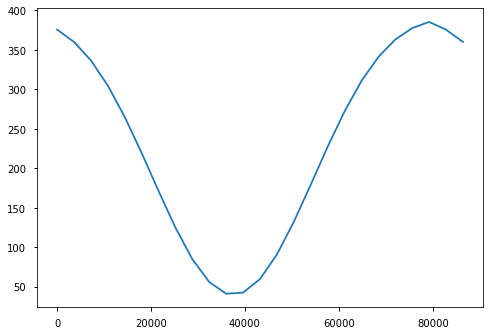

In [185]:
results.node['head']['7'].plot()

<AxesSubplot:>

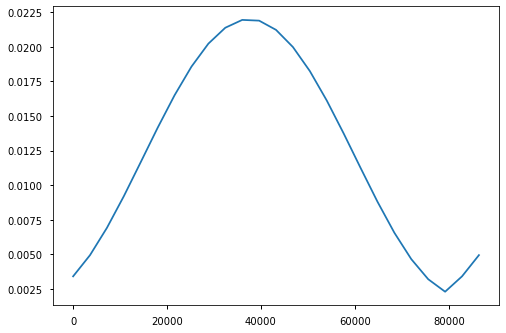

In [192]:
results.link['flowrate']['E'].plot()

In [178]:
results.node['pressure'].div(10).loc[12*3600]

name
3      1.286086e+01
4      1.148826e+01
5      1.098139e+01
6      8.737446e+00
7      5.986635e+00
8      3.700020e+01
res    1.526679e-08
Name: 43200, dtype: float32

(<matplotlib.collections.PathCollection at 0x7f473410c370>,
 <matplotlib.collections.LineCollection at 0x7f473410ce20>)

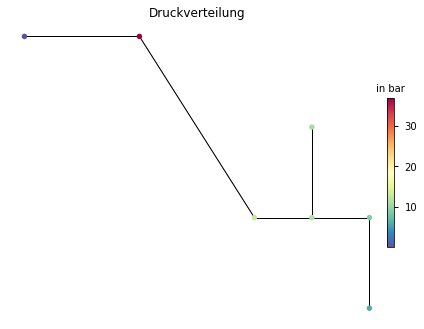

In [179]:
# Plot results on the network
pressure = results.node['pressure'].div(10).loc[12*3600]
wntr.graphics.plot_network(wn, node_attribute=pressure, node_size=30, title='Druckverteilung', node_colorbar_label='in bar')#


In [132]:
plt.style.use('seaborn-notebook')

flowrate


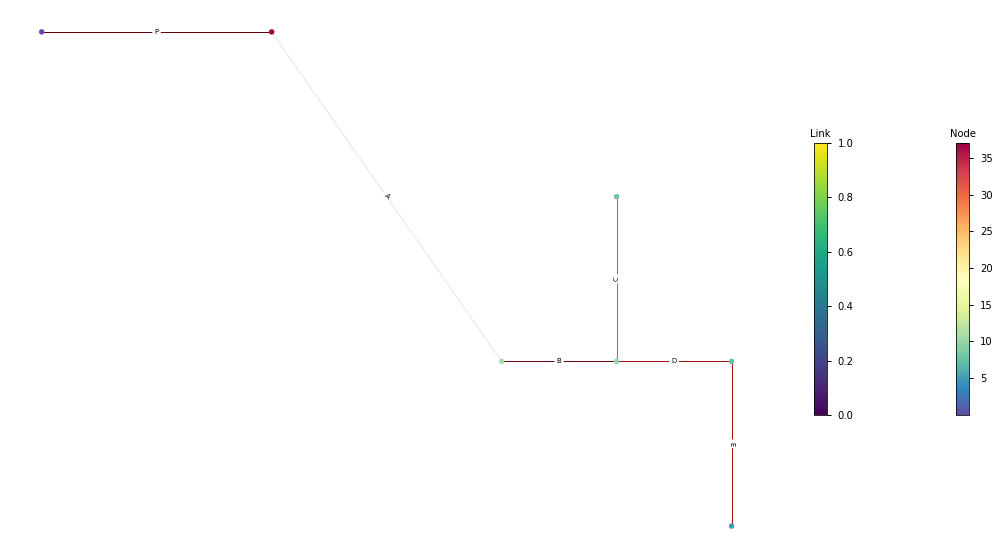

In [133]:
pressure = results.node['pressure'].div(10).iloc[0]

for par in ['flowrate', 'velocity']:
    print(par)
    p = results.link[par].iloc[0]
    
    fig,ax = plt.subplots(figsize=(20,10))
    wntr.graphics.plot_network(wn, link_attribute=p, node_attribute=pressure, node_size=30,link_labels=True,node_labels=False, ax=ax, 
                               link_cmap=plt.get_cmap('Reds'))#
    plt.show()
    
    break

flowrate


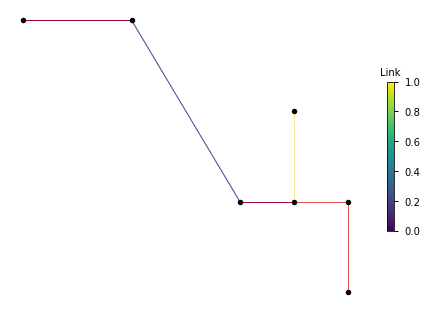

velocity


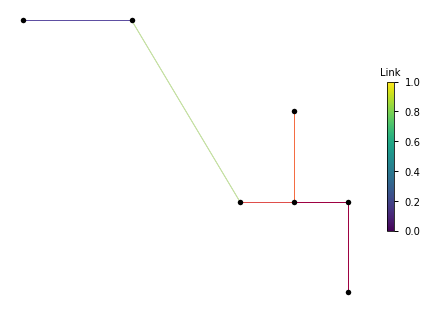

In [134]:
for par in ['flowrate', 'velocity']:
    print(par)
    p = results.link[par].iloc[0]
    
    wntr.graphics.plot_network(wn, link_attribute=p, node_size=30)#
    plt.show()

In [ ]:
 nodes, edges = wntr.graphics.plot_network(wn, node_attribute='elevation',
...    node_colorbar_label='Elevation (m)')

In [85]:
results.link['flowrate']

name,B,C,D,E,A,P
0,0.012,0.004,0.005,0.005,-0.013,0.013


In [ ]:
# Plot results on the network
pressure = results.node['pressure'].div(10).loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure, node_size=30, title='Druckverteilung', node_colorbar_label='in bar')#
